# Models of Neurons II

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.rcParams["figure.figsize"] = (15, 7)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

title_fontsize = 36
ax_fontsize = 28
label_fontsize = 20

Vp = 1
Vreset = .1

## Non-linear models

In [29]:
def QIF_neuron(t,dt,V0,b):
    # Numerical simulation of a QIF neuron
    N = int(t/dt)+1
    V = V0*np.ones(N)
    for i in range(1,N):
        updt_V = b + V[i-1]**2
        V[i] = V[i-1] + dt*updt_V
        if V[i] > Vp:
            V[i] = Vreset
    return V

### $b > 0$

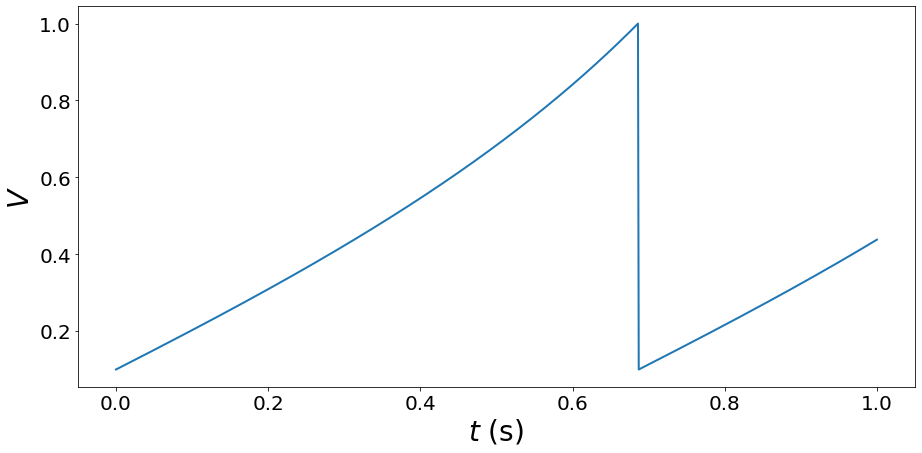

In [10]:
b = 1
V0 = Vreset
dt = .001
t = 1
time_abs = np.linspace(0,t,int(t/dt)+1)

V = QIF_neuron(t,dt,V0,b)

plt.plot(time_abs,V,lw=2)
plt.xlabel(r"$t$ (s)", fontsize=ax_fontsize)
plt.ylabel(r"$V$", fontsize=ax_fontsize)
plt.show()

In [11]:
def thr_QIF_neuron(t,dt,V0,b):
    # Numerical simulation of a QIF neuron
    N = int(t/dt)+1
    t0 = 1/np.sqrt(b) * np.arctan(V0/np.sqrt(b))
    V = np.sqrt(b)*np.tan(np.sqrt(b)*(dt*np.arange(N)+t0))
    return V

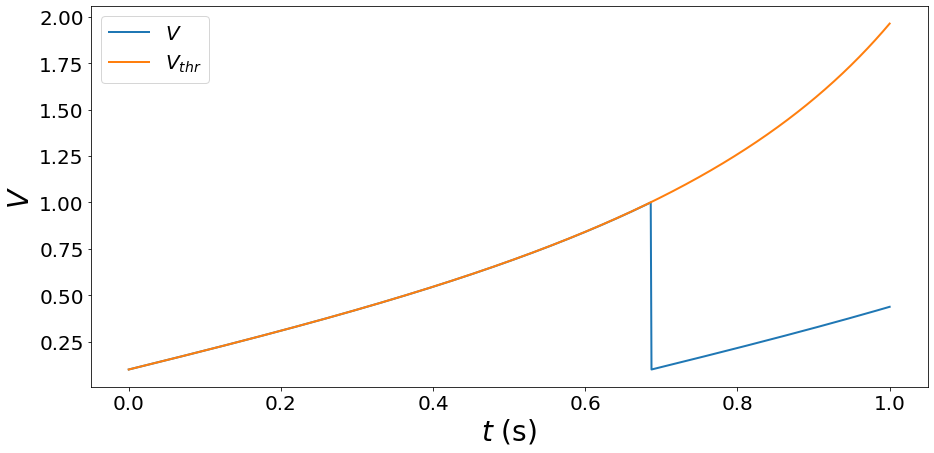

In [12]:
b = 1
V0 = Vreset
dt = .001
t = 1
time_abs = np.linspace(0,t,int(t/dt)+1)

V = QIF_neuron(t,dt,V0,b)
Vt = thr_QIF_neuron(t,dt,V0,b)

plt.plot(time_abs,V,lw=2,label=r"$V$")
plt.plot(time_abs,Vt,lw=2,label=r"$V_{thr}$")
plt.xlabel(r"$t$ (s)", fontsize=ax_fontsize)
plt.ylabel(r"$V$", fontsize=ax_fontsize)
plt.legend(fontsize=label_fontsize)
plt.show()

### $b < 0$

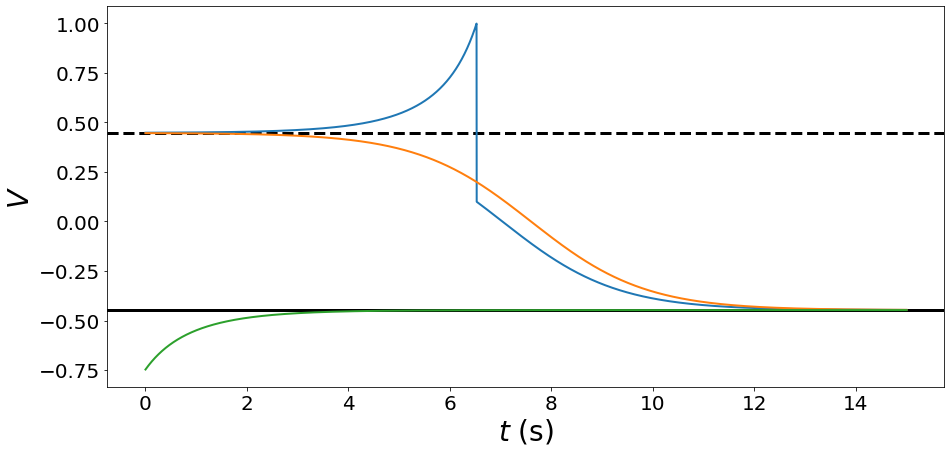

In [24]:
b = -.2
t = 15
time_abs = np.linspace(0,t,int(t/dt)+1)

V0s = [np.sqrt(np.abs(b))+.001, np.sqrt(np.abs(b))-.001, -np.sqrt(np.abs(b))-.3]
labels = ["unstable", "unstable", "cvg in time", "stable"]

plt.axhline(np.sqrt(np.abs(b)),ls='--',lw=3,color='k')
plt.axhline(-np.sqrt(np.abs(b)),lw=3,color='k')
for k in range(len(V0s)):
    V0 = V0s[k]
#     label = labels[k]
    V = QIF_neuron(t,dt,V0,b)
    plt.plot(time_abs,V,lw=2)
#     plt.plot(time_abs,V,lw=2,label=label)
plt.xlabel(r"$t$ (s)", fontsize=ax_fontsize)
plt.ylabel(r"$V$", fontsize=ax_fontsize)
# plt.legend(fontsize=label_fontsize)
plt.show()

### Bistability

We want now to see the oscillations when $v_{reset} > \sqrt{b}$ and demonstrate bistability.

In [30]:
def QIF_neuron_current(t,dt,V0,b):
    # Numerical simulation of a QIF neuron with a time-dependent b
    N = int(t/dt)+1
    V = V0*np.ones(N)
    for i in range(1,N):
        updt_V = b[i] + V[i-1]**2
        V[i] = V[i-1] + dt*updt_V
        if V[i] > Vp:
            V[i] = Vreset
    return V

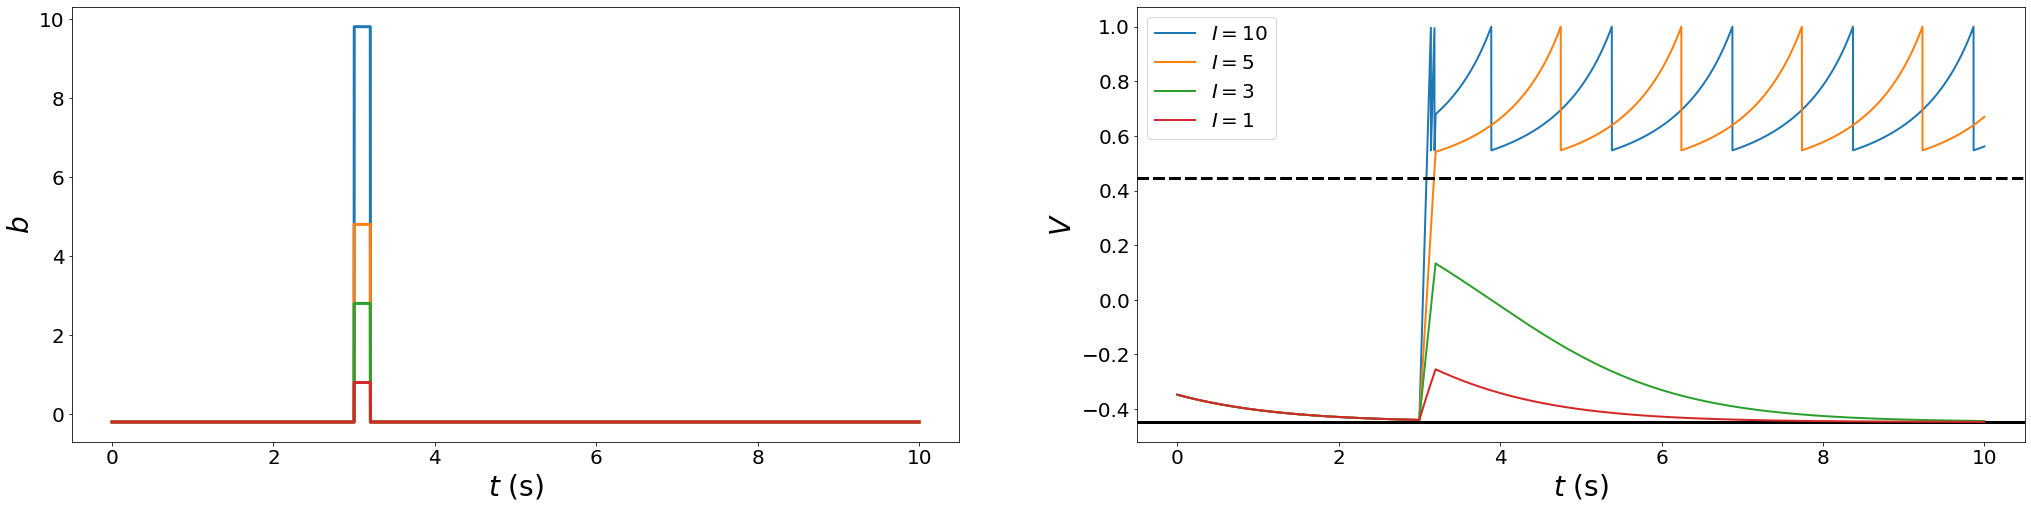

In [44]:
b = -.2
Vreset = np.sqrt(np.abs(b)) + .1
V0 = -np.sqrt(np.abs(b)) + .1

dt = .001
t = 10
time_abs = np.linspace(0,t,int(t/dt)+1)

def step_I(I0, time_abs=time_abs, t_min=3, t_max=3.2):
    I = I0*np.ones(int(t/dt)+1)
    I[time_abs<t_min] = 0
    I[time_abs>t_max] = 0
    return I

fig, axes = plt.subplots(1,2,figsize=(35,8))

I0s = [1, 3, 5, 10]
for I0 in np.flip(I0s):
    bt = b + step_I(I0=I0)
    V = QIF_neuron_current(t,dt,V0,bt)
    axes[0].plot(time_abs,bt,lw=3)
    axes[0].set_xlabel(r"$t$ (s)", fontsize=ax_fontsize)
    axes[0].set_ylabel(r"$b$", fontsize=ax_fontsize)
    axes[1].axhline(np.sqrt(np.abs(b)),ls='--',lw=3,color='k')
    axes[1].axhline(-np.sqrt(np.abs(b)),lw=3,color='k')
    axes[1].plot(time_abs,V,lw=2,label=r"$I = "+str(I0)+"$")
    axes[1].set_xlabel(r"$t$ (s)", fontsize=ax_fontsize)
    axes[1].set_ylabel(r"$V$", fontsize=ax_fontsize)
    axes[1].legend(fontsize=label_fontsize)
plt.show()